In [1]:
import os
from skimage import io
import pylab as plt
from cs_sim.batch.batch_corrupt import batch_corrupt_image
from cs_sim.batch.batch_synth import batch_generate_img_with_lines

from csnet.dataset import CS_Dataset
from csnet.utils import show_image_grid
from torch.utils.data import DataLoader

In [2]:
dir_gt = 'data/train/gt'
dir_img = 'data/train/img'

n_img = 10
imgshape = (16, 64, 64)

In [3]:
os.makedirs(dir_gt, exist_ok=True)
os.makedirs(dir_img, exist_ok=True)

batch_generate_img_with_lines(n_img=n_img, n_jobs=1, dir_out=dir_gt,
                              imgshape=imgshape, n_lines=10, maxval=255)
batch_corrupt_image(dir_gt, dir_img, n_jobs=1,
                    corruption_steps=[
                        ('poisson_noise', {'snr': 2}),
                        ('convolve', {'sigma': 2}),
                        ('gaussian_noise', {'snr': 50})
                    ])

/research/sharedresources/cbi/common/Anna/anaconda3/envs/quamd/lib/python3.9/site-packages/cs_sim/batch/batch_synth.py:48: UserWarning: data/train/gt/line_img_00000.tif is a low contrast image
  io.imsave(fn_out, img.astype(__get_type(img)))
/research/sharedresources/cbi/common/Anna/anaconda3/envs/quamd/lib/python3.9/site-packages/cs_sim/batch/batch_synth.py:48: UserWarning: data/train/gt/line_img_00001.tif is a low contrast image
  io.imsave(fn_out, img.astype(__get_type(img)))
/research/sharedresources/cbi/common/Anna/anaconda3/envs/quamd/lib/python3.9/site-packages/cs_sim/batch/batch_synth.py:48: UserWarning: data/train/gt/line_img_00002.tif is a low contrast image
  io.imsave(fn_out, img.astype(__get_type(img)))
/research/sharedresources/cbi/common/Anna/anaconda3/envs/quamd/lib/python3.9/site-packages/cs_sim/batch/batch_synth.py:48: UserWarning: data/train/gt/line_img_00003.tif is a low contrast image
  io.imsave(fn_out, img.astype(__get_type(img)))
/research/sharedresources/cbi/co

In [4]:
dir_gt = 'data/test/gt'
dir_img = 'data/test/img'

n_img = 4
imgshape = (16, 64, 64)

In [5]:
os.makedirs(dir_gt, exist_ok=True)
os.makedirs(dir_img, exist_ok=True)

batch_generate_img_with_lines(n_img=n_img, n_jobs=1, dir_out=dir_gt,
                              imgshape=imgshape, n_lines=10, maxval=255)
batch_corrupt_image(dir_gt, dir_img, n_jobs=1,
                    corruption_steps=[
                        ('poisson_noise', {'snr': 2}),
                        ('convolve', {'sigma': 2}),
                        ('gaussian_noise', {'snr': 50})
                    ])

/research/sharedresources/cbi/common/Anna/anaconda3/envs/quamd/lib/python3.9/site-packages/cs_sim/batch/batch_synth.py:48: UserWarning: data/test/gt/line_img_00000.tif is a low contrast image
  io.imsave(fn_out, img.astype(__get_type(img)))
/research/sharedresources/cbi/common/Anna/anaconda3/envs/quamd/lib/python3.9/site-packages/cs_sim/batch/batch_synth.py:48: UserWarning: data/test/gt/line_img_00001.tif is a low contrast image
  io.imsave(fn_out, img.astype(__get_type(img)))
/research/sharedresources/cbi/common/Anna/anaconda3/envs/quamd/lib/python3.9/site-packages/cs_sim/batch/batch_synth.py:48: UserWarning: data/test/gt/line_img_00002.tif is a low contrast image
  io.imsave(fn_out, img.astype(__get_type(img)))
/research/sharedresources/cbi/common/Anna/anaconda3/envs/quamd/lib/python3.9/site-packages/cs_sim/batch/batch_synth.py:48: UserWarning: data/test/gt/line_img_00003.tif is a low contrast image
  io.imsave(fn_out, img.astype(__get_type(img)))


In [6]:
ds = CS_Dataset(dir_img, dir_gt)
dl = DataLoader(ds, batch_size=2, num_workers=2, shuffle=False)

In [7]:
images, masks = next(iter(dl))

/research/sharedresources/cbi/common/Anna/anaconda3/envs/quamd/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


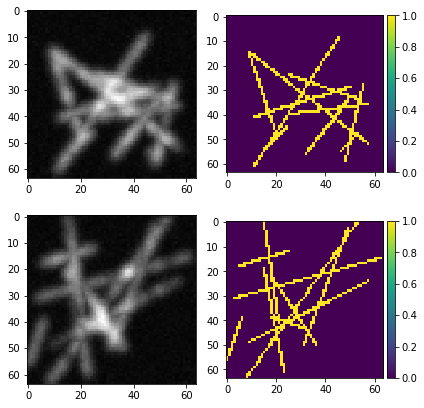

In [8]:
show_image_grid([images, masks])